<a href="https://colab.research.google.com/github/Vijay-Akshar/Data-Science-Projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#How big is the dataset?
df = pd.read_csv('/content/titanic.csv')
df.shape

(891, 12)

In [3]:
#What does the dataset look like?
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
476,477,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S


In [4]:
print("Unique values in 'Sex' column:")
print(df['Sex'].unique())
print(f"Number of unique values: {df['Sex'].nunique()}\n")

print("Unique values in 'Pclass' column:")
print(df['Pclass'].unique())
print(f"Number of unique values: {df['Pclass'].nunique()}\n")

print("Unique values in 'Embarked' column:")
print(df['Embarked'].unique())
print(f"Number of unique values: {df['Embarked'].nunique()}\n")

Unique values in 'Sex' column:
['male' 'female']
Number of unique values: 2

Unique values in 'Pclass' column:
[3 1 2]
Number of unique values: 3

Unique values in 'Embarked' column:
['S' 'C' 'Q' nan]
Number of unique values: 3



In [5]:
#What are the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We see cabin has a LOT of null values, Age has a few. So let's see what null values are there

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


oof

In [7]:
#How does the data look mathematically?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Are there duplicated values
df.duplicated().sum()

np.int64(0)

In [9]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
df.corr(numeric_only=True)['Age']

,Age
PassengerId,0.036847
Survived,-0.077221
Pclass,-0.369226
Age,1.000000
SibSp,-0.308247
Parch,-0.189119
Fare,0.096067


Here passengerID has almost no correlation with the age, survival rates have little negative correlation - that is if you're younger you have a VERY slightly worse chance of surviving but it's barely anything. There's moderate correlation between class and age, Younger passengers tended to be in lower classes, older passengers more often in 1st class. There was an inverse relationship between age and number of siblings and spouses - you tended to be younger if you have a lot of siblings and spouses. Same thing for parents/children, If you have parents/children aboard, you tend to be younger. Finally, Richer passengers were slightly older, but the effect is tiny.  

Let's work on the database, and like fix the values. Let's make the use case of "With these parameters, did this passenger survive?". I'll first fill in the gaps

In [11]:
#I used mode as embarked is a categorical value
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

/tmp/ipython-input-3855559789.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(embarked_mode, inplace=True)


In [12]:
#I used mode as age is a numerical value
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

/tmp/ipython-input-3211241816.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [13]:
# I dropped the 'Cabin' column due to a large number of missing values
df.drop('Cabin', axis=1, inplace=True)

In [14]:
# Verify that all missing values have been handled
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


No more missing values

In [15]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,S
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,C
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,28.0,0,0,12460,7.7500,Q
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,C


In [16]:
#Dropping Fare and ticket as Idk how it mattered when the titanic sunk
df.drop(['Fare', 'Ticket'], axis=1, inplace=True)

In [17]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,C
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,S
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,C
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,S
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,C
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,S
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,S


In [18]:
# Define the mapping for 'Embarked' column
embarked_mapping = {'S': 1, 'Q': 2, 'C': 3}

# Apply the mapping to the 'Embarked' column using a lambda function
df['Embarked'] = df['Embarked'].apply(lambda x: embarked_mapping.get(x, x))
print(df['Embarked'].unique())
df.sample(10)

[1 3 2]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
557,558,0,1,"Robbins, Mr. Victor",male,28.0,0,0,3
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,3
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,3
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,2
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,1
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,1
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,1
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,3
107,108,1,3,"Moss, Mr. Albert Johan",male,28.0,0,0,1
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,1


In [19]:
# Define the mapping for 'Embarked' column
embarked_mapping = {'female': 1, 'male' : 0}

# Apply the mapping to the 'Embarked' column using a lambda function
df['Sex'] = df['Sex'].apply(lambda x: embarked_mapping.get(x, x))
print(df['Sex'].unique())
df.sample(10)

[0 1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",0,28.0,8,2,1
179,180,0,3,"Leonard, Mr. Lionel",0,36.0,0,0,1
229,230,0,3,"Lefebre, Miss. Mathilde",1,28.0,3,1,1
784,785,0,3,"Ali, Mr. William",0,25.0,0,0,1
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",1,43.0,1,6,1
476,477,0,2,"Renouf, Mr. Peter Henry",0,34.0,1,0,1
57,58,0,3,"Novel, Mr. Mansouer",0,28.5,0,0,3
363,364,0,3,"Asim, Mr. Adola",0,35.0,0,0,1
29,30,0,3,"Todoroff, Mr. Lalio",0,28.0,0,0,1
355,356,0,3,"Vanden Steen, Mr. Leo Peter",0,28.0,0,0,1


In [20]:
df['Age'] = df['Age'].astype(int)
df.info()
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Embarked     891 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 62.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",0,28,0,0,1
434,435,0,1,"Silvey, Mr. William Baird",0,50,1,0,1
825,826,0,3,"Flynn, Mr. John",0,28,0,0,2
177,178,0,1,"Isham, Miss. Ann Elizabeth",1,50,0,0,3
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",1,52,1,0,3
144,145,0,2,"Andrew, Mr. Edgardo Samuel",0,18,0,0,1
202,203,0,3,"Johanson, Mr. Jakob Alfred",0,34,0,0,1
566,567,0,3,"Stoytcheff, Mr. Ilia",0,19,0,0,1
109,110,1,3,"Moran, Miss. Bertha",1,28,1,0,2
562,563,0,2,"Norman, Mr. Robert Douglas",0,28,0,0,1


In [21]:
# I'm dropping the 'Name' and 'PassengerID' column. Yeah i dont see if it's needed to survive
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22,1,0,1
1,1,1,1,38,1,0,3
2,1,3,1,26,0,0,1
3,1,1,1,35,1,0,1
4,0,3,0,35,0,0,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
# 'Survived' is our target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (712, 6)
Testing features shape: (179, 6)
Training target shape: (712,)
Testing target shape: (179,)


In [23]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.4f}")

Model Accuracy on Test Set: 0.8045


But like this gives me 80% accuracy let's try deep learning methods

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC

In [42]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [43]:
scaler = StandardScaler(with_mean=True, with_std=True)
X_tr_sc = scaler.fit_transform(X_tr)
X_val_sc = scaler.transform(X_val)

In [46]:
classes = np.unique(y_tr)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_tr)
class_weight = {int(c): float(w) for c, w in zip(classes, cw)}

In [47]:
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4), input_shape=(X_tr_sc.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='roc_auc', curve='ROC'), AUC(name='pr_auc', curve='PR')]
)

In [49]:
es = EarlyStopping(monitor='val_pr_auc', mode='max', patience=10, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_pr_auc', mode='max', factor=0.5, patience=5)

In [50]:
hist = model.fit(
    X_tr_sc, y_tr,
    validation_data=(X_val_sc, y_val),
    epochs=200,
    batch_size=256,
    callbacks=[es, rlr],
    class_weight=class_weight,
    verbose=0
)

In [55]:
X_test_sc = scaler.transform(X_test)
loss, accuracy, roc_auc, pr_auc = model.evaluate(X_test_sc, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")
print(f"Test PR AUC: {pr_auc:.4f}")

Test Loss: 0.5585
Test Accuracy: 0.8252
Test ROC AUC: 0.9114
Test PR AUC: 0.8916


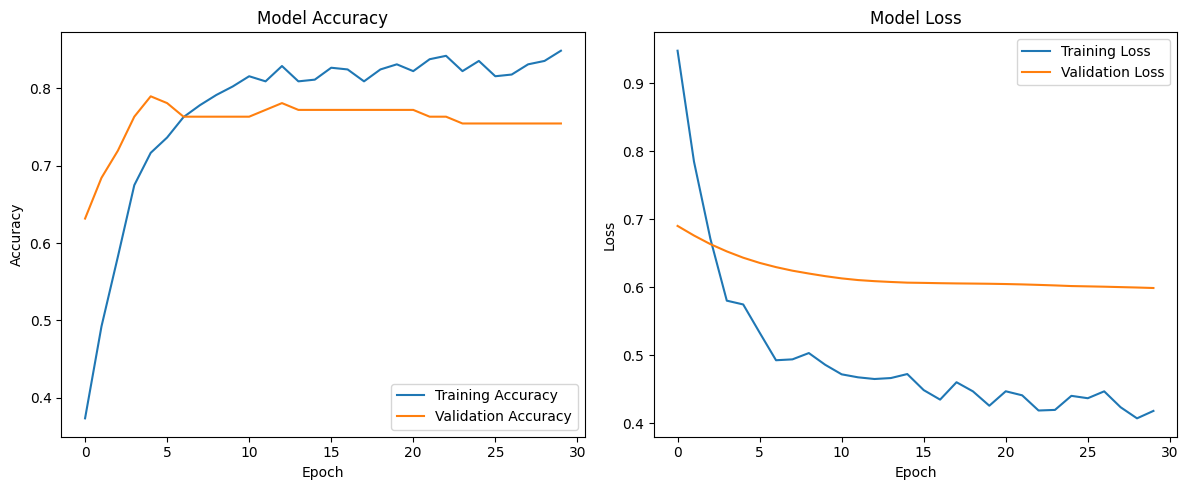

In [56]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()